<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The sales manager at an electronics company wants to study if online sales of their products in 2019 follow the same distribution as the online sales of products in 2015. He collected the sample of 300 products sold in 2019. Help the manager to test his claim using p-value technique at a 99% confidence level.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<img src='chi_2.png'>

In [2]:
# type your code here
#Step1:-Hypothesis Formation:-
#H0:Observed=Expected
#Ha:Observed!=Expected

#step2:-
#1.Data is Normal and Right Skewed
#2.More Than 2Sample=>Chi-square Test

#Step3:-Chi Square Test Statistics:-
#observed Count
obs_count=np.array([38,20,42])#%Sale in 2015
print('Observed_Count:',obs_count)

n=300
print('Sample_Size:',n)

#Expected Count
exp_count=np.array([85,90,125])#frequency of items sold in 2019
print('Expected_Count:',exp_count)

stats.chisquare(f_exp=exp_count,f_obs=obs_count)

Observed_Count: [38 20 42]
Sample_Size: 300
Expected_Count: [ 85  90 125]


Power_divergenceResult(statistic=135.54467973856208, pvalue=3.688474362056332e-30)

In [ ]:
#Step 4:-Finding P_Value
#pvalue=3.688474362056332e-30
#significance Level=0.01
#pval<sign lvl=>H0 is Rejected,Ha is Selected which means Observed!=Expected
#The Observed Count is Not Same as Expected Count 

###### INFERENCE:-
    The Observed Count is Not Same as Expected Count,hence Sales Manager Claim of online sales of their products in 2019 do not follow the same distribution as the online sales of products in 2015

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use hypothesis testing to check if the type of car is dependent on the type of car's transmission. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<img src='chi_ind.png'>

In [1]:
# type your code here
#Step1:-Hypothesis Formation:-
#H0:Type of Car and Car Transmission are independent(No Relation)
#Ha:Type of Car and Car Transmission are Dependent(Relation,not independent)

#Step2:
#1.Data is not Normal=>Right Skewed Data
#2.2 sample and both are categorical so we go with Chi square Test statistics Test for Independence

In [7]:
obs=pd.DataFrame({'Low_Maintenance':[104,35],'Medium_Maintenance':[85,61],'High_Maintenance':[78,72]})
obs

,Low_Maintenance,Medium_Maintenance,High_Maintenance
0,104,85,78
1,35,61,72


In [8]:
#Chi_Square_Test_Statistics
stats.chi2_contingency(obs)

(16.774829953535356,
 0.00022771516717561853,
 2,
 array([[85.31724138, 89.6137931 , 92.06896552],
        [53.68275862, 56.3862069 , 57.93103448]]))

In [9]:
chisquare_test_stats,pval,degree_of_freedom,Expected=stats.chi2_contingency(obs)
print('Chi_Square_Test Statistics:',chisquare_test_stats)
print('PValue:',pval)
print('Degree_Of_Freedom:',degree_of_freedom)
print('Expected_Count:',Expected)

Chi_Square_Test Statistics: 16.774829953535356
PValue: 0.00022771516717561853
Degree_Of_Freedom: 2
Expected_Count: [[85.31724138 89.6137931  92.06896552]
 [53.68275862 56.3862069  57.93103448]]


In [ ]:
#Step4:-P_Value:-
#pval=0.00022
#sign lvl=0.05#industry standard Confidence Level=95%
#pval<sign lvl H0 is Rejected,Ha is Selected which means
#Type of Car and Car Transmission are Dependent(Relation,not independent)

###### INFERENCE:-
    Type of car is dependent on car's transmission that is both have Relation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. A company produces leather belts on three different production lines. The number of defective belts produced by each line is recorded. Test if all the production lines produce on an average equal number of defective belts. Use the p-value technique to test at 5% level of significance.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `defective_prod.xlsx`

In [10]:
# type your code here
df=pd.read_excel('defective_prod.xlsx')
df.head()

,production_line,def_belts
0,A,5
1,C,2
2,B,3
3,A,4
4,C,1


In [ ]:
#Given:-leather belts production_line(Categorical Data) vs def_belts(Continuous/Discrete Data)-we can go for ANOVA TEST STATISTICS
#STEP1:-HYPOTHESIS FORMATION
#H0:All Means are Equal
#Ha:Atleast One Mean are Different

In [11]:
df['production_line'].value_counts()

C    7
B    7
A    7
Name: production_line, dtype: int64

In [12]:
a=df[df['production_line']=='A']['def_belts']
a

0     5
3     4
5     6
8     4
10    7
14    5
17    4
Name: def_belts, dtype: int64

In [13]:
b=df[df['production_line']=='B']['def_belts']
b

2     3
6     3
9     8
11    2
13    9
16    2
20    1
Name: def_belts, dtype: int64

In [14]:
c=df[df['production_line']=='C']['def_belts']
c

1     2
4     1
7     2
12    1
15    3
18    6
19    8
Name: def_belts, dtype: int64

In [ ]:
#Assumptions:-
#1.Data is Normal
#2.Data Variance are Equal

In [15]:
#TEST OF NORMALITY:-SHAPIRO WILK TEST
#H0:Skew=0
#Ha:skew!=0
print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.shapiro(c))

(0.8557514548301697, 0.1386316567659378)
(0.8036767840385437, 0.04453404247760773)
(0.8339223861694336, 0.08714758604764938)


In [ ]:
#All pval are greater than sign lvl=0.05 hence H0:Skew=0 i.e Data is Normal

In [16]:
#TEST OF VARIANCE:-Equal Variance:Levene Test
#Ho:All Data Variance are Equal
#Ha:All Data Variance not Equal 
stats.levene(a,b,c)

LeveneResult(statistic=0.8375, pvalue=0.4489726403784061)

In [ ]:
#pval greater than sign lvl hence H0-All Data Variance are Equal
#All Variance are Equal

In [17]:
#STEP2:-ANOVA F-Test:-
stats.f_oneway(a,b,c)

F_onewayResult(statistic=0.8384615384615386, pvalue=0.44857788134106824)

In [ ]:
#STEP3:-PVALUE:-
#pval=0.448
#sign lvl=0.05
#pval>sign val H0 is Selected,Ha is Rejected which means All Data means are Equal

###### INFERENCE:-
    Hence the Company's production line produce average equal number of defective belts

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. The company wants to decide their advertisement strategies for their new smartwatch. The manager collects the advertising cost (in dollars) for four different mediums. Test if the company is spending on average an equal amount on all the advertising mediums with 99% confidence.If it is different,find which medium is different.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `ad_cost.xlsx`

In [18]:
# type your code here
df=pd.read_excel('ad_cost.xlsx')
df

,medium,cost
0,Snapmart,252
1,Picbook,378
2,Funsta,312
3,Klicker,297
4,Picbook,361
5,Snapmart,274
6,Klicker,352
7,Picbook,343
8,Funsta,320
9,Snapmart,242


In [20]:
df['medium'].value_counts()

Picbook     3
Snapmart    3
Klicker     3
Funsta      3
Name: medium, dtype: int64

In [21]:
Picbook_w_cost=df[df['medium']=='Picbook']['cost']
Picbook_w_cost

1    378
4    361
7    343
Name: cost, dtype: int64

In [22]:
Snapmart_w_cost=df[df['medium']=='Snapmart']['cost']
Snapmart_w_cost

0    252
5    274
9    242
Name: cost, dtype: int64

In [23]:
Klicker_w_cost=df[df['medium']=='Klicker']['cost']
Klicker_w_cost

3     297
6     352
10    305
Name: cost, dtype: int64

In [24]:
Funsta_w_cost=df[df['medium']=='Funsta']['cost']
Funsta_w_cost

2     312
8     320
11    325
Name: cost, dtype: int64

In [ ]:
#Assumptions:-
#1.Data is Normal
#2.Data Variance are Equal

In [25]:
#TEST OF NORMALITY:-SHAPIRO WILK TEST
#H0:Skew=0
#Ha:skew!=0
print(stats.shapiro(Picbook_w_cost))
print(stats.shapiro(Snapmart_w_cost))
print(stats.shapiro(Klicker_w_cost))
print(stats.shapiro(Funsta_w_cost))

(0.9997281432151794, 0.9685051441192627)
(0.9552238583564758, 0.5927872061729431)
(0.8564552068710327, 0.2578691840171814)
(0.9825580716133118, 0.7470288276672363)


In [ ]:
#All pval are greater than sign lvl=0.01 hence H0 is Selected H0:Skew=0 hence Data is Normal

In [26]:
#TEST OF VARIANCE:-Equal Variance:Levene Test
#Ho:All Data Variance are Equal
#Ha:All Data Variance not Equal 
stats.levene(Picbook_w_cost,Snapmart_w_cost,Klicker_w_cost,Funsta_w_cost)

LeveneResult(statistic=0.4517895809451024, pvalue=0.7230913376085835)

In [ ]:
#pval greater than sign lvl=0.01 hence H0 is Selected H0-All Data Have Variance are Equal
#All Variance are Equal

In [27]:
#STEP2:-ANOVA F-Test:-
stats.f_oneway(Picbook_w_cost,Snapmart_w_cost,Klicker_w_cost,Funsta_w_cost)

F_onewayResult(statistic=14.880471006443026, pvalue=0.001230153853232096)

In [ ]:
#STEP3:-PVALUE:-
#pval=0.0012
#sign lvl=0.01
#pval<sign val H0 is Rejected,Ha is Selected which means Atleast one Data mean is not Equal

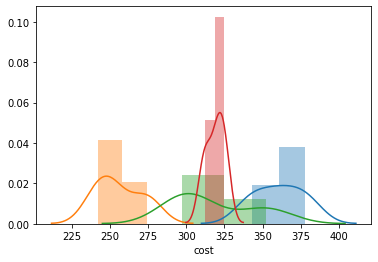

In [29]:
import matplotlib.pyplot as plt
sns.distplot(Picbook_w_cost)
sns.distplot(Snapmart_w_cost)
sns.distplot(Klicker_w_cost)
sns.distplot(Funsta_w_cost)

plt.show()

###### INFERENCE:-
    The company is not spending average equal amount on all the advertising mediums with 99% confidence level.

In [31]:
Picbook_w_cost_num=np.array([Picbook_w_cost])
Snapmart_w_cost_num=np.array([Snapmart_w_cost])
Klicker_w_cost_num=np.array([Klicker_w_cost])
Funsta_w_cost_num=np.array([Funsta_w_cost])

In [32]:
total = np.concatenate([Picbook_w_cost_num,Snapmart_w_cost_num,Klicker_w_cost,Funsta_w_cost])
total

array([[378, 361, 343],
       [252, 274, 242],
       [297, 352, 305],
       [312, 320, 325]], dtype=int64)

In [33]:
df['cost']

0     252
1     378
2     312
3     297
4     361
5     274
6     352
7     343
8     320
9     242
10    305
11    325
Name: cost, dtype: int64

In [35]:
df_company=pd.DataFrame({'medium':['Picbook','Snapmart','Klicker','Funsta']*3,'cost':[252,
378,
312,
297,
361,
274,
352,
343,
320,
242,
305,
325]})
df_company

,medium,cost
0,Picbook,252
1,Snapmart,378
2,Klicker,312
3,Funsta,297
4,Picbook,361
5,Snapmart,274
6,Klicker,352
7,Funsta,343
8,Picbook,320
9,Snapmart,242


In [36]:
import statsmodels.stats.multicomp as mc

In [38]:
mc_tk=mc.MultiComparison(data=df_company['cost'],groups=df_company['medium'])
tk_hsd=mc_tk.tukeyhsd(alpha=0.01)
tk_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Funsta,Klicker,1.3333,0.9,-171.0867,173.7533,False
Funsta,Picbook,-10.6667,0.9,-183.0867,161.7533,False
Funsta,Snapmart,-23.6667,0.9,-196.0867,148.7533,False
Klicker,Picbook,-12.0,0.9,-184.42,160.42,False
Klicker,Snapmart,-25.0,0.9,-197.42,147.42,False
Picbook,Snapmart,-13.0,0.9,-185.42,159.42,False


###### INFERENCE:-
    Funsta and Klicker are Same
    Funsta and Picbook are Same
    Funsta and Snapmart are Same
    Klicker and Picbook are Same
    Klicker and Snapmart are Same
    Picbook and Snapmart are Same